In [1]:
import pandas as pd
import numpy as np
car_data = pd.read_csv('C:\\Users\\moksh\\OneDrive\\Desktop\\CarPrice_Assignment.csv')



print(car_data.describe())


           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

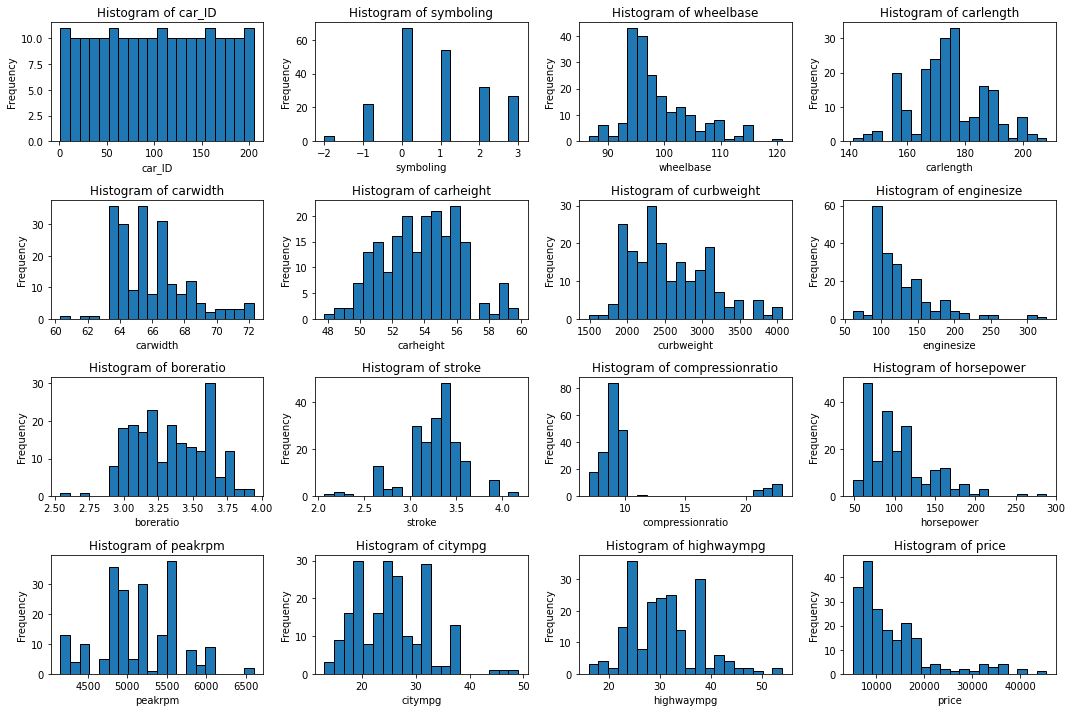

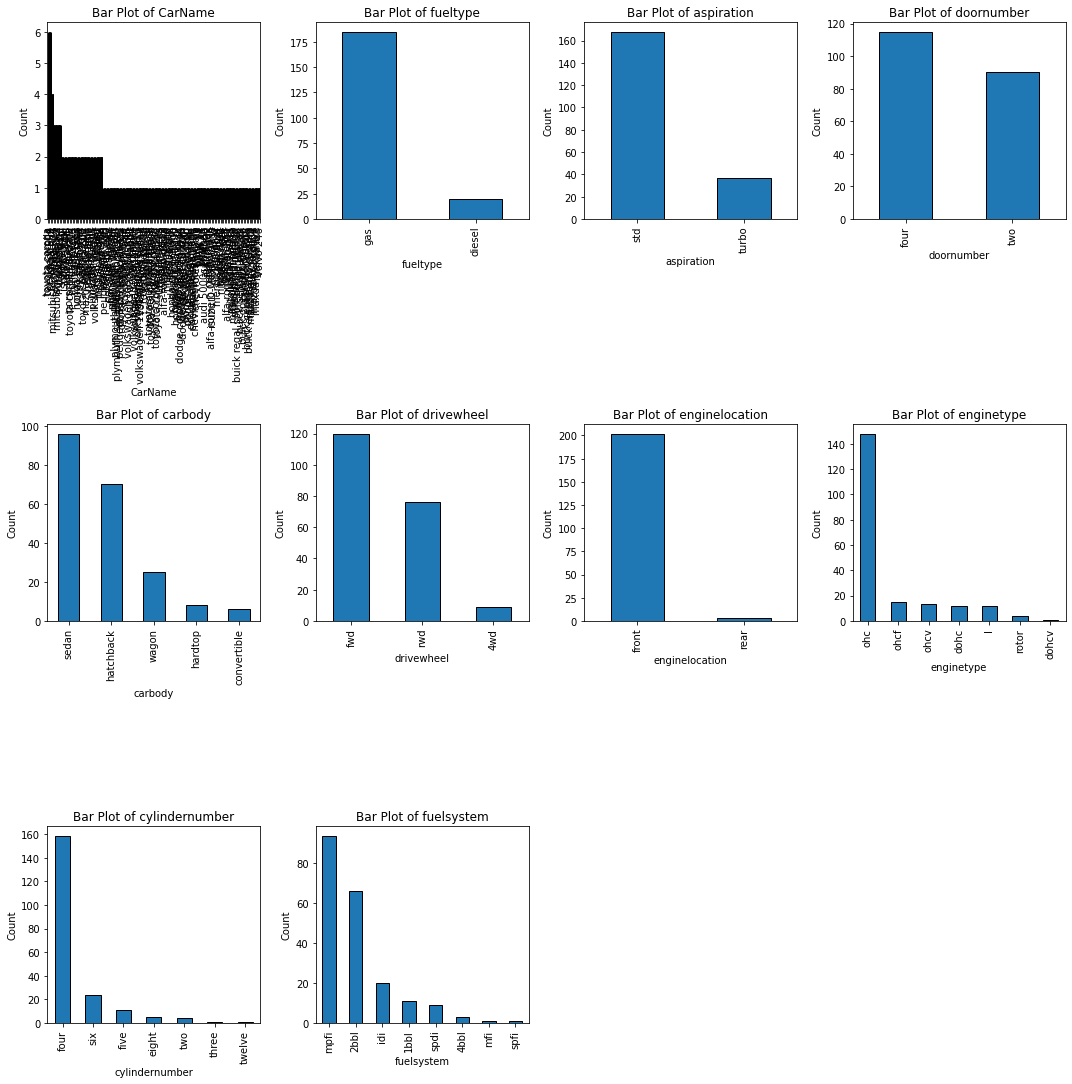

In [2]:
import matplotlib.pyplot as plt

# Create histograms for numerical features
numerical_features = car_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    plt.hist(car_data[feature], bins=20, edgecolor='k')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create bar plots for categorical features
categorical_features = car_data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    car_data[feature].value_counts().plot(kind='bar', edgecolor='k')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [5]:
selected_features = ['enginesize', 'horsepower', 'curbweight', 'carwidth', 'carlength', 'citympg', 'highwaympg', 'fueltype', 'aspiration', 'drivewheel', 'enginetype']


target = 'price'

In [6]:
X = car_data[selected_features]
y = car_data[target]


X.fillna(X.mean(), inplace=True)


X_encoded = pd.get_dummies(X, columns=['fueltype', 'aspiration', 'drivewheel', 'enginetype'])


X_encoded = np.column_stack([np.ones(X_encoded.shape[0]), X_encoded])

# Apply feature scaling
X_encoded[:, 1:] = (X_encoded[:, 1:] - np.mean(X_encoded[:, 1:], axis=0)) / np.std(X_encoded[:, 1:], axis=0)

C:\Users\moksh\AppData\Local\Temp\ipykernel_19396\1125516668.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.mean(), inplace=True)
C:\Users\moksh\AppData\Local\Temp\ipykernel_19396\1125516668.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [24]:
split_ratio = 0.8
split_index = int(split_ratio * X_encoded.shape[0])
X_train, X_test = X_encoded[:split_index], X_encoded[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
alpha = 1.0

# Initialize parameters
def initialize_parameters(X):
    m, n = X.shape
    parameters = {
        'm': np.random.rand(n),
        'c': np.random.rand()
    }
    return parameters

# Forward propagation
def forward_propagation(X, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.dot(X, m) + c
    return predictions
# Mean squared error
def mean_squared_error(predictions, y, m, alpha):
    mse = np.mean((predictions - y) ** 2)
    regularization_term = alpha * np.sum(m[1:] ** 2)
    return mse + regularization_term

# Gradient descent
def gradient_descent(X, y, parameters, num_iterations, initial_learning_rate, alpha):
    m = parameters['m']
    c = parameters['c']
    m_history, c_history = [m], [c]
    learning_rate = initial_learning_rate

    for i in range(num_iterations):
        predictions = forward_propagation(X, parameters)
        error = y - predictions
        dm = (-2 * np.dot(X.T, error) / len(y)) + 2 * alpha * m
        dc = -2 * np.sum(error) / len(y)

        m = m - learning_rate * dm
        c = c - learning_rate * dc

        m_history.append(m)
        c_history.append(c)


        learning_rate = initial_learning_rate / (1 + i)
    parameters['m'] = m
    parameters['c'] = c

    return parameters, m_history, c_history

In [25]:
num_iterations = 1000
initial_learning_rate = 0.01
parameters = initialize_parameters(X_train)
parameters, m_history, c_history = gradient_descent(X_train, y_train, parameters, num_iterations, initial_learning_rate, alpha)

In [26]:
test_predictions = forward_propagation(X_test, parameters)
test_mse = mean_squared_error(test_predictions, y_test, parameters['m'], alpha)
print(f'Test Mean Squared Error: {test_mse}')

Test Mean Squared Error: 73107206.33732118


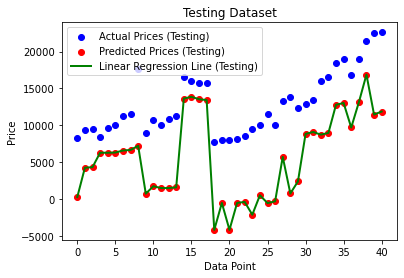

In [27]:
plt.scatter(range(len(y_test)), y_test, label='Actual Prices (Testing)', color='b')
plt.scatter(range(len(y_test)), test_predictions, label='Predicted Prices (Testing)', color='r')
plt.plot(range(len(y_test)), test_predictions, linestyle='-', color='g', linewidth=2, label='Linear Regression Line (Testing)')
plt.xlabel('Data Point')
plt.ylabel('Price')
plt.title('Testing Dataset')
plt.legend()
plt.show()